# Kinetic binding test détermination de Kon

In [1]:
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


In [2]:
#Données CSV
df = pd.read_csv(r"C:\Users\camil\Documents\IMT\2A\Stage_ingénierie\Documents_stage\Experiences\Kinetic_binding_test_kon\test_python.csv")
print(df)

   Concentration;minute_11;minute_10;minute_9;minute_8;minute_7;minute_6;minute_5;minute_4;minute_3;minute_2;minute_1;minute_0
0   Concentration 1;4634305;4555826;5875818;624899...                                                                         
1   Concentration 2;8313008;7269019;7509564;736532...                                                                         
2   Concentration 3;8376763;7198364;6865846;709578...                                                                         
3   Concentration 4;3869436;3610531;3365174;325682...                                                                         
4   Concentration 5;1567531;1432569;1293042;125253...                                                                         
5   Concentration 6;428451;572747;560482;489631;50...                                                                         
6   Concentration 7;335176;334334;342137;263247;30...                                                          

In [3]:
tableau = [
    [4634305, 4555826, 5875818, 6248996, 6227901, 7202350, 6159417, 6354967, 6561584, 5078815, 4808701, 4004054],
    [ 8313008, 7269019, 7509564, 7365329, 7220400, 6867891, 7660672, 7042559, 6520576, 5134297, 4362523, 3026274],
    [8376763, 7198364, 6865846, 7095788, 6831934, 5960482, 5630183, 4871586, 4409775, 3426052, 2877222, 1671370],
    [ 3869436, 3610531, 3365174, 3256824, 3036603, 1342640, 2623718, 2346889, 1975680, 1797403, 1165445, 674874],
    [ 1567531, 1432569, 1293042, 1252531, 1258026, 1145143, 1040954, 908579, 732877, 695209, 395666, 239752],
    [ 428451, 572747, 560482, 489631, 506969, 474004, 450793, 407794, 311490, 289132, 167309, 105414],
    [ 335176, 334334, 342137, 263247, 302353, 264560, 289115, 241677, 217471, 155143, 94259, 55176],
    [ 2876, 1941, 1361, 1197, 1460, 1569, 1252, 951, 798, 837, 891, 580]
]

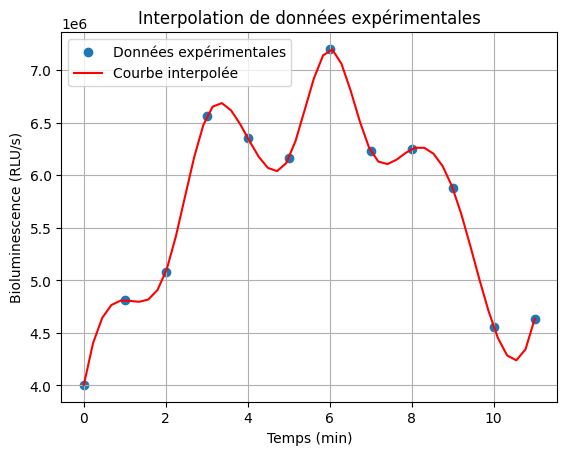

Coefficients de l'interpolation : [array([4.004054e+06, 3.026274e+06, 1.671370e+06, 6.748740e+05,
       2.397520e+05, 1.054140e+05, 5.517600e+04, 5.800000e+02]), array([4.40117947e+06, 3.48567095e+06, 2.09251324e+06, 7.24956845e+05,
       2.27920602e+05, 1.00025814e+05, 6.18861188e+04, 7.03112933e+02]), array([4.64243094e+06, 3.83295496e+06, 2.40980408e+06, 8.18380029e+05,
       2.49370945e+05, 1.08328821e+05, 6.98207709e+04, 7.91502571e+02]), array([4.76513194e+06, 4.09234509e+06, 2.64372029e+06, 9.44660248e+05,
       2.96564132e+05, 1.27234024e+05, 7.89435239e+04, 8.49895693e+02]), array([4.80660601e+06, 4.28806041e+06, 2.81473962e+06, 1.09331420e+06,
       3.61961267e+05, 1.53652425e+05, 8.92179455e+04, 8.83019079e+02]), array([4.80417668e+06, 4.44431997e+06, 2.94333981e+06, 1.25385858e+06,
       4.38023451e+05, 1.84495028e+05, 1.00607603e+05, 8.95599510e+02]), array([4.79516751e+06, 4.58534283e+06, 3.04999862e+06, 1.41581009e+06,
       5.17211790e+05, 2.16672834e+05, 1.13076

In [103]:
from scipy.interpolate import interp1d

for liste in tableau:
        longueur_liste = len(liste)
        temps = list(range(longueur_liste-1, -1, -1))

y = tableau[:len(tableau)]

# Créer une fonction d'interpolation à partir des données
interp_func = interp1d(temps, y, kind='cubic')

x_interp = np.linspace(min(temps), max(temps))
y_interp = interp_func(x_interp)

# Tracez les données expérimentales et la courbe interpolée
plt.scatter(temps, y[0], label='Données expérimentales')
plt.plot(x_interp, y_interp[0], label='Courbe interpolée', color='red')
plt.xlabel('Temps (min)')
plt.ylabel('Bioluminescence (RLU/s)')
plt.title('Interpolation de données expérimentales')
plt.legend()
plt.grid(True)
plt.show()



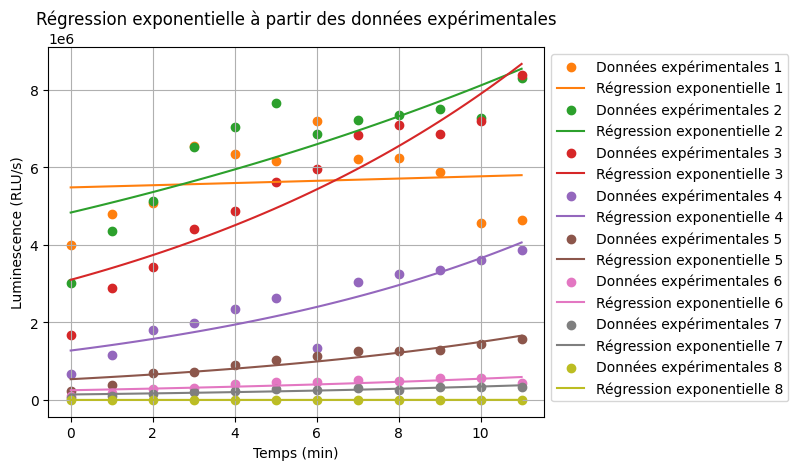

In [4]:
def exponential_func(x, a, b):
    return a * np.exp(b * x)

def fit_and_plot_exp(tableau):
    # Initialisations
    a_opts = []
    b_opts = []
    r2_exp = []
    liste_predictions = []

    # Définition des valeurs de temps
    for liste in tableau:
        longueur_liste = len(liste)
        temps = list(range(longueur_liste-1, -1, -1))

    # Stockage des concentrations
    concentrations = tableau[:len(tableau)]

    # Régression exponentielle pour les 8 concentrations
    for i in range(0, len(tableau)):
        concentration = concentrations[i]  
        # Régression exponentielle
        popt, pcov = curve_fit(exponential_func, temps, concentration)
        a_opt, b_opt = popt

        # Données pour la courbe ajustée
        x_fit = np.linspace(min(temps), max(temps))
        y_fit = exponential_func(x_fit, *popt) #L'étoile veut dire qu'on prend les deux paramètres du tuple et qu'on les passe en argument de la fonction exp

        

        # Données brutes
        plt.scatter(temps, concentration, color=f'C{i+1}', label=f'Données expérimentales {i+1}')

        # Courbe ajustée
        plt.plot(x_fit, y_fit, '-', color=f'C{i+1}', label=f'Régression exponentielle {i+1}')

        a_opts.append(a_opt)
        b_opts.append(b_opt)
   
    for i in range(len(tableau)):
        concentration = concentrations[i]
        popt, _ = curve_fit(exponential_func, temps, concentration)
        y_fit = exponential_func(np.array(temps), *popt)
        r2 = r2_score(concentration, y_fit)
        r2_exp.append(r2)

        liste_predictions.append(y_fit)

    plt.grid(True)
    plt.xlabel('Temps (min)')
    plt.ylabel('Luminescence (RLU/s)')
    plt.title('Régression exponentielle à partir des données expérimentales')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))    
    plt.show()

    return  a_opts, b_opts, r2_exp, liste_predictions

a_opts, b_opts, r2_exp, y_fit_exp = fit_and_plot_exp(tableau)


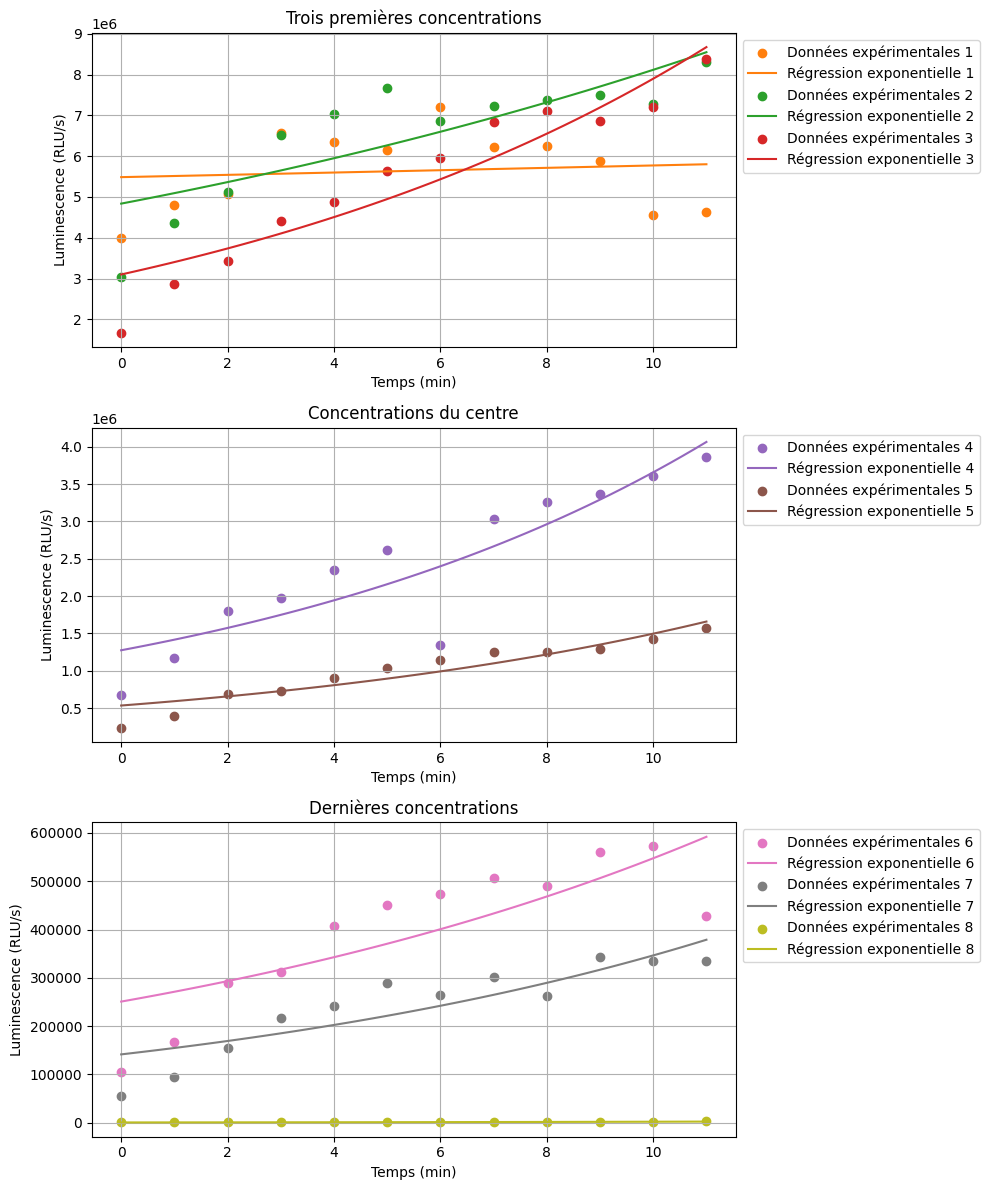

In [5]:
def exponential_func(x, a, b):
    return a * np.exp(b * x)

def fit_and_plot(tableau):
    # Initialisations
    a_opts = []
    b_opts = []
    r2_exp = []

    # Définition des valeurs de temps
    for liste in tableau:
        longueur_liste = len(liste)
        temps = list(range(longueur_liste-1, -1, -1))

    # Stockage des concentrations
    concentrations = tableau[:len(tableau)]

    # Figure avec 3 sous-graphiques
    fig, axes = plt.subplots(3, 1, figsize=(10, 12))

    axes[0].set_title('Trois premières concentrations')
    # Régression exponentielle pour les premières trois concentrations
    for i in range(3):
        concentration = concentrations[i]  
        popt, _ = curve_fit(exponential_func, temps, concentration)
        a_opt, b_opt = popt

        # Données pour la courbe ajustée
        x_fit = np.linspace(min(temps), max(temps))
        y_fit = exponential_func(x_fit, *popt)

        # Données brutes
        axes[0].scatter(temps, concentration, color=f'C{i+1}', label=f'Données expérimentales {i+1}')

        # Courbe ajustée
        axes[0].plot(x_fit, y_fit, '-', color=f'C{i+1}', label=f'Régression exponentielle {i+1}')

        a_opts.append(a_opt)
        b_opts.append(b_opt)

    for i in range(3):
        concentration = concentrations[i]
        popt, _ = curve_fit(exponential_func, temps, concentration)
        y_fit = exponential_func(np.array(temps), *popt)
        r2 = r2_score(concentration, y_fit)
        r2_exp.append(r2)

    axes[1].set_title('Concentrations du centre')
    # Régression exponentielle pour les concentrations du centre
    for i in range(3, 5):
        concentration = concentrations[i]
        popt, _ = curve_fit(exponential_func, temps, concentration)
        a_opt, b_opt = popt

        # Données pour la courbe ajustée
        x_fit = np.linspace(min(temps), max(temps))
        y_fit = exponential_func(x_fit, *popt)

        # Données brutes
        axes[1].scatter(temps, concentration, color=f'C{i+1}', label=f'Données expérimentales {i+1}')

        # Courbe ajustée
        axes[1].plot(x_fit, y_fit, '-', color=f'C{i+1}', label=f'Régression exponentielle {i+1}')

        a_opts.append(a_opt)
        b_opts.append(b_opt)

    for i in range(3,5):
        concentration = concentrations[i]
        popt, _ = curve_fit(exponential_func, temps, concentration)
        y_fit = exponential_func(np.array(temps), *popt)
        r2 = r2_score(concentration, y_fit)
        r2_exp.append(r2)

    axes[2].set_title('Dernières concentrations')
    # Régression exponentielle pour les dernières concentrations
    for i in range(5, len(tableau)):
        concentration = concentrations[i]
        popt, _ = curve_fit(exponential_func, temps, concentration)
        a_opt, b_opt = popt

        # Données pour la courbe ajustée
        x_fit = np.linspace(min(temps), max(temps))
        y_fit = exponential_func(x_fit, *popt)

        # Données brutes
        axes[2].scatter(temps, concentration, color=f'C{i+1}', label=f'Données expérimentales {i+1}')

        # Courbe ajustée
        axes[2].plot(x_fit, y_fit, '-', color=f'C{i+1}', label=f'Régression exponentielle {i+1}')

 
        a_opts.append(a_opt)
        b_opts.append(b_opt)

    for i in range(5,len(tableau)):
        concentration = concentrations[i]
        popt, _ = curve_fit(exponential_func, temps, concentration)
        y_fit = exponential_func(np.array(temps), *popt)
        r2 = r2_score(concentration, y_fit)
        r2_exp.append(r2)

    # Labels et légendes pour chaque sous-graphique
    for ax in axes:
        ax.grid(True)
        ax.set_xlabel('Temps (min)')
        ax.set_ylabel('Luminescence (RLU/s)')
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

    plt.tight_layout()
    plt.show()

    return a_opts, b_opts, r2_exp

a_opts, b_opts, r2_exp = fit_and_plot(tableau)


In [6]:
for i in range(0,len(tableau)):
    print(f"Le paramètre de détermination R² pour la concentration_{i+1} est égal à : {r2_exp[i]*100} %" )
print("")

tab = [a_opts,b_opts]
for i in range(0,len(tableau)):
    print(f"Les paramètres optimaux pour la concentration_{i+1} sont égaux à : a_opt = {a_opts[i]}, b_opt = {b_opts[i]}")

Le paramètre de détermination R² pour la concentration_1 est égale à : 1.2513379398429003 %
Le paramètre de détermination R² pour la concentration_2 est égale à : 66.99129230966079 %
Le paramètre de détermination R² pour la concentration_3 est égale à : 88.61607853744925 %
Le paramètre de détermination R² pour la concentration_4 est égale à : 80.77133645596763 %
Le paramètre de détermination R² pour la concentration_5 est égale à : 87.93979748136789 %
Le paramètre de détermination R² pour la concentration_6 est égale à : 65.61731455639836 %
Le paramètre de détermination R² pour la concentration_7 est égale à : 75.95222615133095 %
Le paramètre de détermination R² pour la concentration_8 est égale à : 79.79979117049307 %

Les paramètres optimaux pour la concentration_1 sont égaux à : a_opt = 5486231.100763119, b_opt = 0.005089604547968727
Les paramètres optimaux pour la concentration_2 sont égaux à : a_opt = 4837160.868643142, b_opt = 0.05176769383393246
Les paramètres optimaux pour la c

In [7]:
def export_exp(nom_fichier,tab, r2):
 
    # Écriture des données dans le fichier CSV
    with open(nom_fichier, mode='w', newline='') as fichier_csv:
        writer = csv.writer(fichier_csv)
        writer.writerow(["a et b"])
        writer.writerows(tab)

        writer.writerow(["R2"])
        for val in r2 :    
            writer.writerow([val])

    print("Exportation des données terminée.")

export_exp("donnees_kon.csv", tab, r2_exp)


Exportation des données terminée.


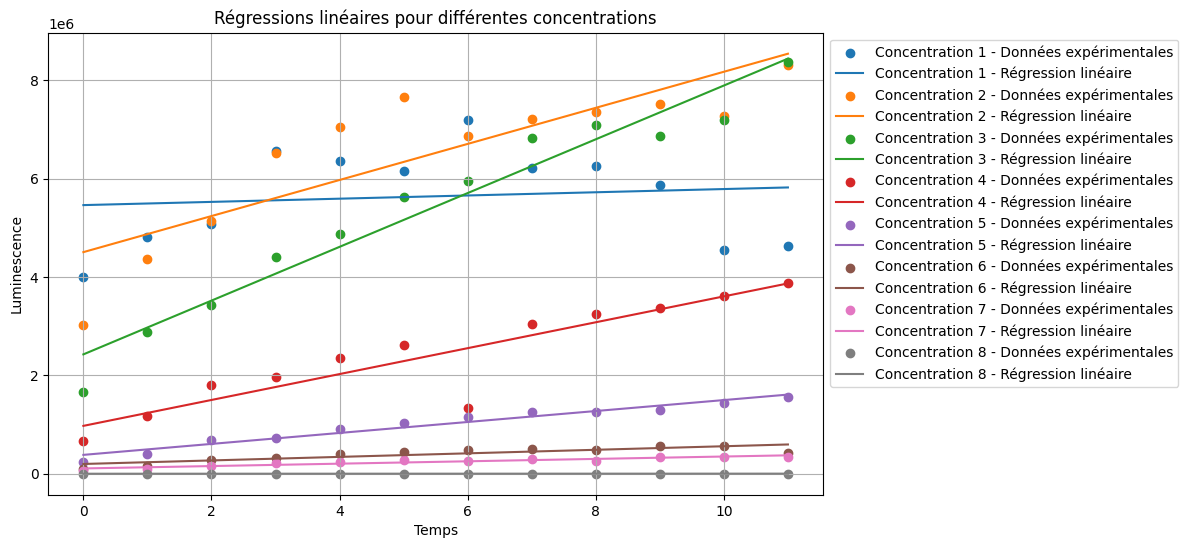

In [8]:
def fit_and_plot_lin(tableau): 
    liste_predictions = []

    for liste in tableau:
        longueur_liste = len(liste)
        temps = list(range(longueur_liste-1, -1, -1))
    x_fit = np.array(temps).reshape(-1, 1)
    concentrations = tableau[:len(tableau)]  
    coefficients_directeurs = []
    r2 = []

    plt.figure(figsize=(10, 6))

    for i, concentration in enumerate(concentrations):
        # Modèle de régression linéaire
        modele = LinearRegression()
        modele.fit(x_fit, concentration)
        predictions = modele.predict(x_fit)

        # Extraction des coefficients directeurs
        coefficient_directeur = modele.coef_[0]
        coefficients_directeurs.append(coefficient_directeur)
    
        liste_predictions.append(predictions)

        # Données et régression linéaire pour chaque concentration
        plt.scatter(x_fit, concentration, label=f'Concentration {i+1} - Données expérimentales')
        plt.plot(x_fit, predictions, linestyle='-', label=f'Concentration {i+1} - Régression linéaire')

        r2.append(r2_score(concentration, predictions))

    plt.grid(True)
    plt.xlabel('Temps')
    plt.ylabel('Luminescence')
    plt.title('Régressions linéaires pour différentes concentrations')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

    return r2, coefficients_directeurs, liste_predictions

r2_lin, coefficients_directeurs, y_fit_lin = fit_and_plot_lin(tableau)


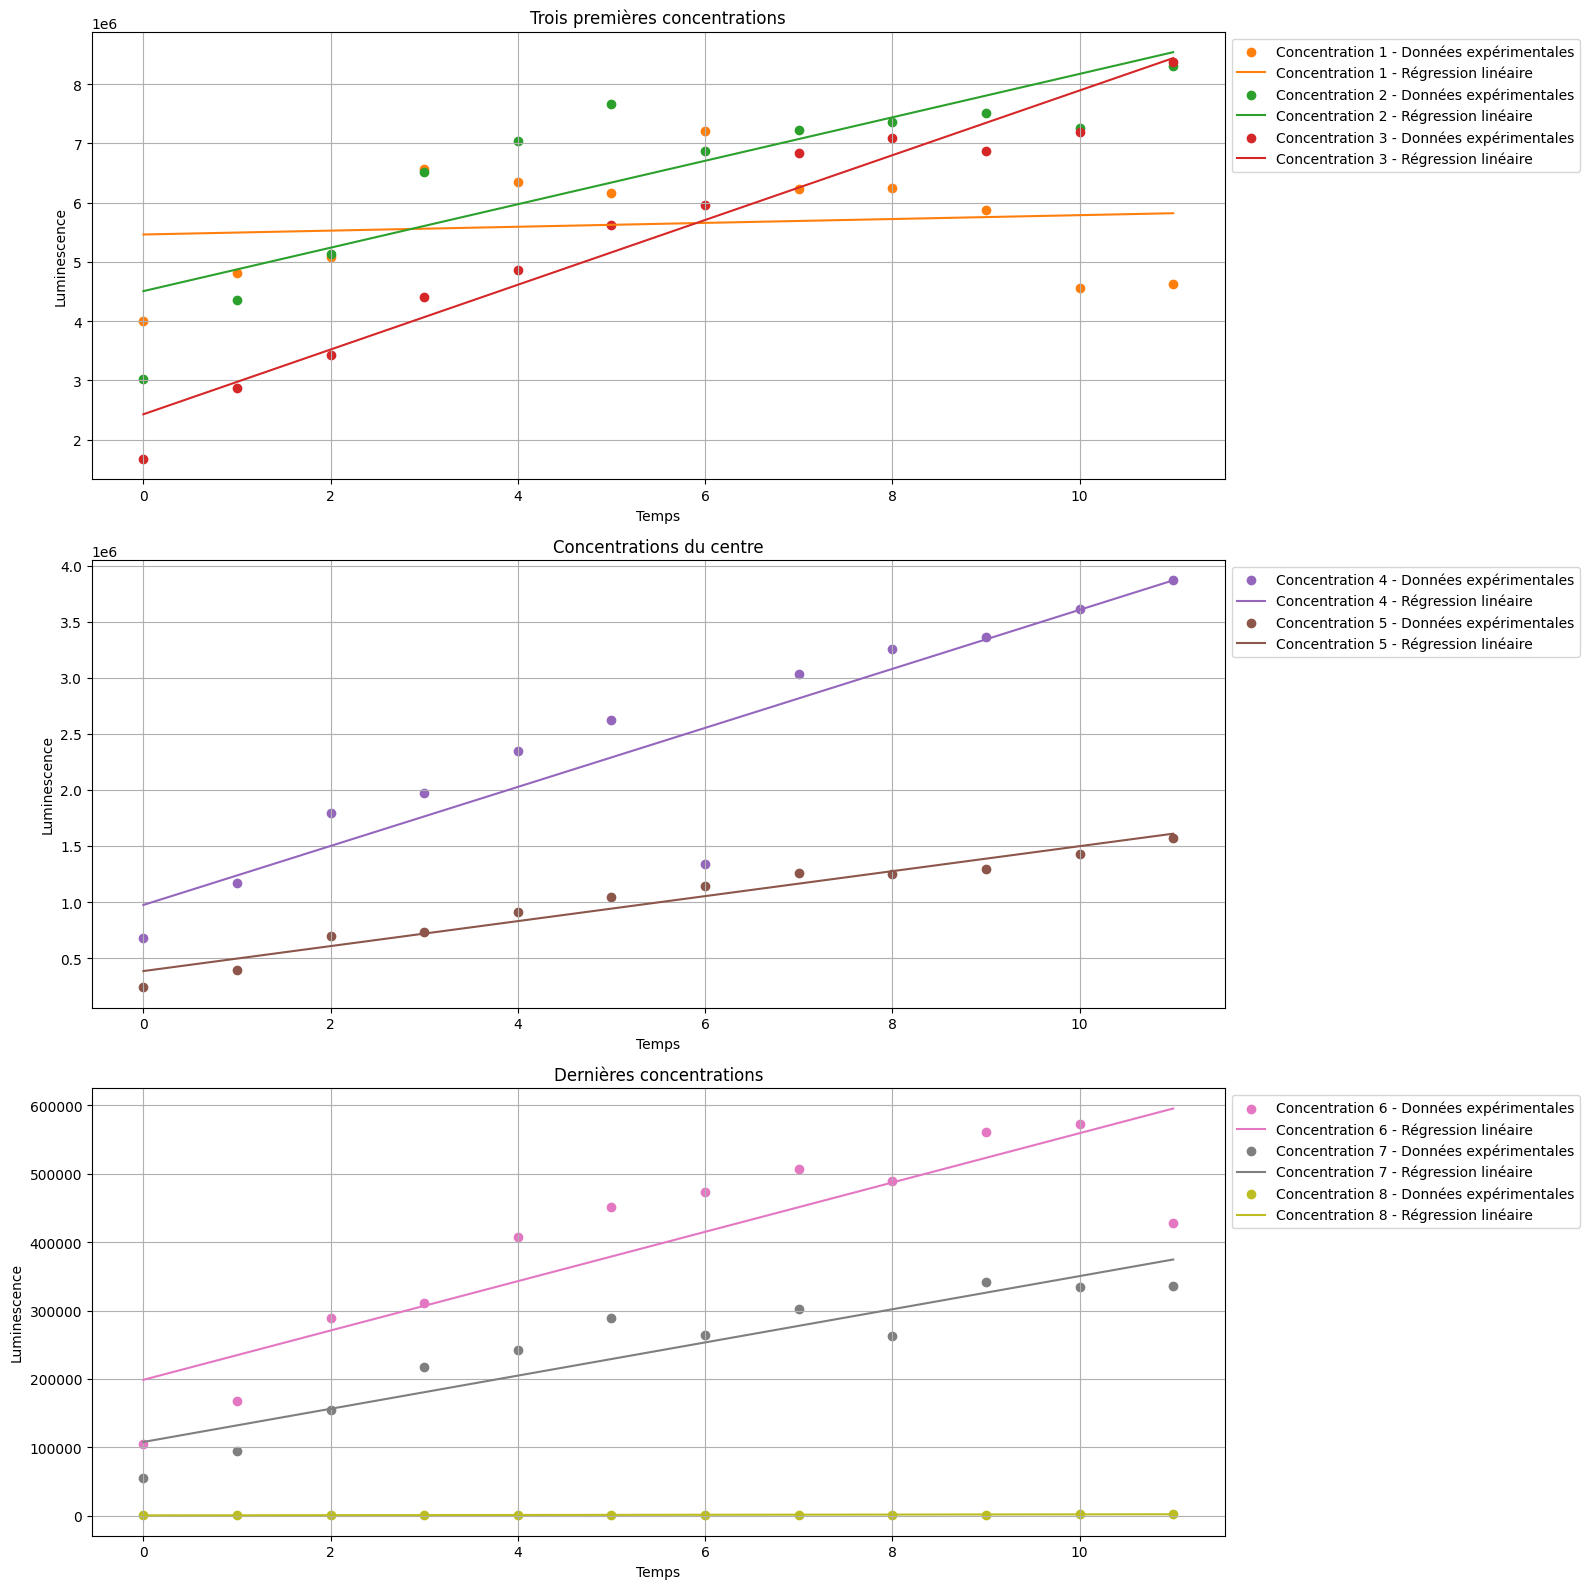

In [9]:
def fit_and_plot_lin_bis(tableau):
    # Supposons que 'tableau' soit votre tableau de listes
    fig, axes = plt.subplots(3, 1, figsize=(16, 16))

    # Premières quatre concentrations
    concentrations_1 = tableau[:3]
    axes[0].set_title('Trois premières concentrations')

    for i, concentration in enumerate(concentrations_1):
        longueur_liste = len(concentration)
        temps = list(range(longueur_liste-1, -1, -1))
        x_fit = np.array(temps).reshape(-1, 1)

        modele = LinearRegression()
        modele.fit(x_fit, concentration)
        predictions = modele.predict(x_fit)

        axes[0].scatter(x_fit, concentration, label=f'Concentration {i+1} - Données expérimentales', color=f'C{i+1}')
        axes[0].plot(x_fit, predictions, linestyle='-', label=f'Concentration {i+1} - Régression linéaire',color=f'C{i+1}')

    # Premières quatre concentrations
    concentrations_2 = tableau[3:5]
    axes[1].set_title('Concentrations du centre')

    for i, concentration in enumerate(concentrations_2):
        longueur_liste = len(concentration)
        temps = list(range(longueur_liste-1, -1, -1))
        x_fit = np.array(temps).reshape(-1, 1)

        modele = LinearRegression()
        modele.fit(x_fit, concentration)
        predictions = modele.predict(x_fit)

        axes[1].scatter(x_fit, concentration, label=f'Concentration {i+4} - Données expérimentales',color=f'C{i+4}')
        axes[1].plot(x_fit, predictions, linestyle='-', label=f'Concentration {i+4} - Régression linéaire',color=f'C{i+4}')

    # Dernières concentrations
    concentrations_3 = tableau[5:]
    axes[2].set_title('Dernières concentrations')

    for i, concentration in enumerate(concentrations_3):
        longueur_liste = len(concentration)
        temps = list(range(longueur_liste-1, -1, -1))
        x_fit = np.array(temps).reshape(-1, 1)

        modele = LinearRegression()
        modele.fit(x_fit, concentration)
        predictions = modele.predict(x_fit)

        axes[2].scatter(x_fit, concentration, label=f'Concentration {i+6} - Données expérimentales', color=f'C{i+6}')
        axes[2].plot(x_fit, predictions, linestyle='-', label=f'Concentration {i+6} - Régression linéaire', color=f'C{i+6}')

    # Ajouter des labels et une légende
    for ax in axes:
        ax.set_xlabel('Temps')
        ax.set_ylabel('Luminescence')
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        ax.grid(True)

    plt.tight_layout()
    plt.show()

fit_and_plot_lin_bis(tableau)


In [10]:
for i in range(0,len(tableau)):
    print(f"Le paramètre de détermination R² pour la concentration_{i+1} est égal à : {r2_lin[i]*100} %" )

Le paramètre de détermination R² pour la concentration_1 est égal à : 1.4220589344611345 %
Le paramètre de détermination R² pour la concentration_2 est égal à : 72.77577872775709 %
Le paramètre de détermination R² pour la concentration_3 est égal à : 95.10777326067145 %
Le paramètre de détermination R² pour la concentration_4 est égal à : 83.3038346353766 %
Le paramètre de détermination R² pour la concentration_5 est égal à : 95.28961582819579 %
Le paramètre de détermination R² pour la concentration_6 est égal à : 75.91501568182211 %
Le paramètre de détermination R² pour la concentration_7 est égal à : 85.01722511198555 %
Le paramètre de détermination R² pour la concentration_8 est égal à : 72.7520760827507 %


In [62]:
def export_lin(nom_fic, coefficients_directeurs, r2):

    # Combinaison des données coefficient et r2 en paires
    donnees_combinees = zip(coefficients_directeurs, r2)

    # Écriture des données dans le fichier CSV
    with open(nom_fic, mode='w', newline='') as fichier_csv:
        writer = csv.writer(fichier_csv)
    
        # Écrire l'en-tête du fichier CSV
        writer.writerow(['Coefficient', 'R2'])
    
        # Écrire les données combinées dans le fichier CSV
        writer.writerows(donnees_combinees)

    print("Exportation des données terminée.")

export_lin("donnees_kon_lineaire.csv", coefficients_directeurs, r2_lin) 


Exportation des données terminée.


In [63]:
# Evaluation de la performance des modèles de régression 

concentrations = tableau[:len(tableau)]

linear_mse = mean_squared_error(concentrations, y_fit_lin)
exp_mse = mean_squared_error(concentrations, y_fit_exp)

print(f"Linear Regression MSE:", linear_mse)
print(f"Exponentielle Regression MSE:", exp_mse)
print("")

for i in range(0,len(concentrations)):  
    exp_mse = mean_squared_error(concentrations[i], y_fit_exp[i])
    linear_mse = mean_squared_error(concentrations[i], y_fit_lin[i])
  
    print(f"Linear Regression MSE au tour {i}: \n" , linear_mse)
    print(f"Exponentielle Regression MSE au tour {i}: \n", exp_mse)   



Linear Regression MSE: 230261842588.55777
Exponentielle Regression MSE: 281698378787.0552

Linear Regression MSE au tour 0: 
 880006316145.1617
Exponentielle Regression MSE au tour 0: 
 881530344258.7408
Linear Regression MSE au tour 1: 
 599756155806.6915
Exponentielle Regression MSE au tour 1: 
 727189785688.7198
Linear Regression MSE au tour 2: 
 183238933571.86807
Exponentielle Regression MSE au tour 2: 
 426386130449.4642
Linear Regression MSE au tour 3: 
 165625604895.16476
Exponentielle Regression MSE au tour 3: 
 190747932908.83298
Linear Regression MSE au tour 4: 
 7316245580.547497
Exponentielle Regression MSE au tour 4: 
 18732103403.713116
Linear Regression MSE au tour 5: 
 4916223921.5676
Exponentielle Regression MSE au tour 5: 
 7018189359.500336
Linear Regression MSE au tour 6: 
 1235163556.8113835
Exponentielle Regression MSE au tour 6: 
 1982472145.6690147
Linear Regression MSE au tour 7: 
 97230.64966977468
Exponentielle Regression MSE au tour 7: 
 72081.80094464806
